In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
if os.name=='nt':
    import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

C:\Users\HP\anaconda3\Lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
C:\Users\HP\anaconda3\Lib\site-packages\setuptools\_distutils\cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/py

Obtaining file:///E:/ML%20Sem-06/Seminar%20project/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [10]:
%pip list

Package                         Version        Editable project location
------------------------------- -------------- ------------------------------------------------------------
absl-py                         1.4.0
altair                          5.3.0
annoy                           1.17.3
anyio                           4.3.0
apache-beam                     2.46.0
argon2-cffi                     23.1.0
argon2-cffi-bindings            21.2.0
array-record                    0.4.1
arrow                           1.3.0
asttokens                       2.4.1
astunparse                      1.6.3
async-lru                       2.0.4
attrs                           23.2.0
avro-python3                    1.10.2
Babel                           2.14.0
beautifulsoup4                  4.12.3
bleach                          6.1.0
blinker                         1.7.0
cachetools                      5.3.3
certifi                         2024.2.2
cffi                            1.16.0
charset-n

In [13]:
%pip install tf-models-official

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install tensorflow-gpu==2.10.0 --upgrade

   ---------------------------------------- 0.0/455.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/455.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/455.9 MB 656.4 kB/s eta 0:11:35
   ---------------------------------------- 0.3/455.9 MB 2.0 MB/s eta 0:03:52
   ---------------------------------------- 0.5/455.9 MB 2.7 MB/s eta 0:02:47
   ---------------------------------------- 0.8/455.9 MB 3.5 MB/s eta 0:02:10
   ---------------------------------------- 1.1/455.9 MB 4.2 MB/s eta 0:01:50
   ---------------------------------------- 1.5/455.9 MB 4.6 MB/s eta 0:01:39
   ---------------------------------------- 1.9/455.9 MB 5.2 MB/s eta 0:01:28
   ---------------------------------------- 2.1/455.9 MB 5.3 MB/s eta 0:01:26
   ---------------------------------------- 2.1/455.9 MB 5.3 MB/s eta 0:01:26
   ---------------------------------------- 2.1/455.9 MB 5.3 MB/s eta 0:01:26
   ---------------------------------------- 2.3/455.9 MB 4.2 MB/s eta 0:01:4

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\envs\\tfod\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



   ---------------------------------------  455.9/455.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  455.9/455.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  455.9/455.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  455.9/455.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  455.9/455.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  455.9/455.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  455.9/455.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  455.9/455.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 455.9/455.9 MB 3.3 MB/s eta 0:00:00


In [16]:
%pip uninstall protobuf matplotlib -y
%pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.6
Uninstalling protobuf-3.19.6:
  Successfully uninstalled protobuf-3.19.6
Found existing installation: matplotlib 3.8.3
Uninstalling matplotlib-3.8.3:
  Successfully uninstalled matplotlib-3.8.3
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.


  Using cached protobuf-5.26.0-cp39-cp39-win_amd64.whl.metadata (592 bytes)
     ---------------------------------------- 0.0/40.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/40.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/40.5 MB 1.4 MB/s eta 0:00:30
     --------------------------------------- 0.0/40.5 MB 667.8 kB/s eta 0:01:01
     ---------------------------------------- 0.2/40.5 MB 1.3 MB/s eta 0:00:31
     ---------------------------------------- 0.2/40.5 MB 1.3 MB/s eta 0:00:33
     ---------------------------------------- 0.4/40.5 MB 1.7 MB/s eta 0:00:24
     ---------------------------------------- 0.5/40.5 MB 1.7 MB/s eta 0:00:25
      --------------------------------------- 0.6/40.5 MB 1.9 MB/s eta 0:00:22
      --------------------------------------- 0.7/40.5 MB 2.0 MB/s eta 0:00:20
      --------------------------------------- 0.8/40.5 MB 2.0 MB/s eta 0:00:21
      --------------------------------------- 0.9/40.5 MB 2.1 MB/s e

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [604 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.2.0]
        python: yes [3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit
                    (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  C:\Users\HP\anaconda3\envs\tfod\lib\site-packages\setuptools\__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can tr

In [7]:
import object_detection

In [10]:
!pip list

Package                         Version        Editable project location
------------------------------- -------------- ------------------------------------------------------------
absl-py                         1.4.0
altair                          5.3.0
annoy                           1.17.3
anyio                           4.3.0
apache-beam                     2.46.0
argon2-cffi                     23.1.0
argon2-cffi-bindings            21.2.0
array-record                    0.4.1
arrow                           1.3.0
asttokens                       2.4.1
astunparse                      1.6.3
async-lru                       2.0.4
attrs                           23.2.0
avro-python3                    1.10.2
Babel                           2.14.0
beautifulsoup4                  4.12.3
bleach                          6.1.0
blinker                         1.7.0
cachetools                      5.3.3
certifi                         2024.2.2
cffi                            1.16.0
charset-n

In [12]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# Label Map

In [8]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# TF records

In [12]:
#if not os.path.exists(files['TF_RECORD_SCRIPT']):
    #!git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [17]:
%%python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}
python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# Copy Model Config to Training Folder

In [18]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# Config For Transfer Learning

In [9]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [10]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [11]:
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [12]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [13]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [14]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# Model Training

In [40]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [41]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [42]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


# Model From Checkpoint

In [15]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [16]:
# Prevent GPU complete consumption
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try: 
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)

In [16]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections


# 8. Detection from image

In [17]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [19]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars428.png')

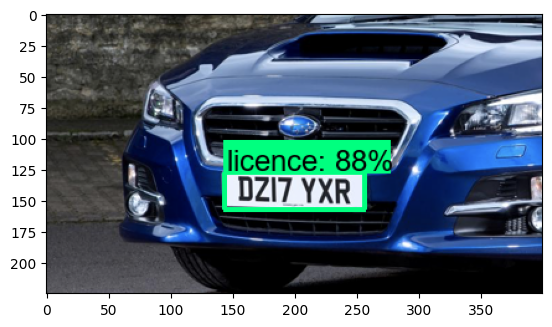

In [20]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

# Apply OCR

In [2]:
!pip uninstall easyocr

^C


In [24]:
!pip install easyocr==1.7.0

  Using cached torch-2.2.2-cp39-cp39-win_amd64.whl.metadata (26 kB)
  Using cached torchvision-0.17.2-cp39-cp39-win_amd64.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB 1.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.2/2.9 MB 2.9 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.9 MB 4.8 MB/s eta 0:00:01
   -------------- ------------------------- 1.1/2.9 MB 6.8 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.9 MB 7.8 MB/s eta 0:00:01
   ------------------------------ --------- 2.2/2.9 MB 8.6 MB/s eta 0:00:01
   ------------------------------------- -- 2.7/2.9 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 9.1 MB/s eta 0:00:00
Using cached torchvision-0.17.2-cp39-cp39-win_amd64.whl (1.2 MB)
Using cached torch-2.2.2-cp39-cp39-win_amd64.whl (198.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\envs\\tfod\\Lib\\site-packages\\torch\\lib\\c10.dll'
Consider using the `--user` option or check the permissions.



In [25]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu111/torch-1.8.1%2Bcu111-cp39-cp39-win_amd64.whl (3055.6 MB)
  Using cached https://download.pytorch.org/whl/cu111/torchvision-0.9.1%2Bcu111-cp39-cp39-win_amd64.whl (1.9 MB)
  Using cached torchaudio-0.8.1-cp39-none-win_amd64.whl.metadata (1.1 kB)
Using cached torchaudio-0.8.1-cp39-none-win_amd64.whl (109 kB)
  Attempting uninstall: torch
    Found existing installation: torch 2.2.2
    Uninstalling torch-2.2.2:
      Successfully uninstalled torch-2.2.2
  Rolling back uninstall of torch
  Moving to c:\users\hp\anaconda3\envs\tfod\lib\site-packages\functorch\
   from C:\Users\HP\anaconda3\envs\tfod\Lib\site-packages\~unctorch
  Moving to c:\users\hp\anaconda3\envs\tfod\lib\site-packages\torch-2.2.2.dist-info\
   from C:\Users\HP\anaconda3\envs\tfod\Lib\site-packages\~orch-2.2.2.dist-info
  Moving to c:\users\hp\anaconda3\envs\tfod\lib\site-packages\torch\__config__.py
 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\envs\\tfod\\Lib\\site-packages\\torch\\lib\\c10_cuda.dll'
Consider using the `--user` option or check the permissions.



In [24]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [31]:
import easyocr

In [32]:
detection_threshold = 0.7

In [28]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [29]:
width = image.shape[1]
height = image.shape[0]

[0.5714193  0.3593672  0.70100754 0.6449488 ]
[128.5693422  143.74687672 157.72669762 257.97951221]
[([[8, 0], [108, 0], [108, 29], [8, 29]], 'DZI7 YXR', 0.9029130623690803)]


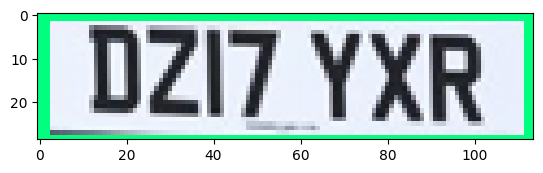

In [33]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [34]:
for result in ocr_result:
    #print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

DZI7 YXR


# OCR Filtering

In [35]:
region_threshold = 0.05

In [36]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [37]:
filter_text(region, ocr_result, region_threshold)

['DZI7 YXR']

In [38]:
region_threshold = 0.6

In [39]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

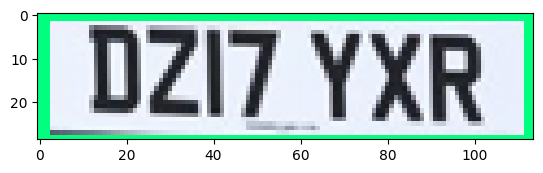

['DZI7 YXR']


In [40]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

# Saving the Result from OCR

In [41]:
import csv
import uuid

In [42]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [43]:
region

array([[[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [255, 239, 232],
        [127, 255,   0],
        [127, 255,   0]],

       ...,

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [253, 239, 232],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [253, 240, 232],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]]

In [44]:
save_results(text, region, 'detection_results.csv', 'Detection_Img')

# Detection from Webcam

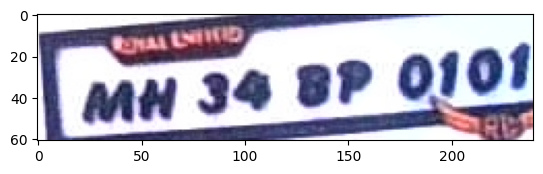

[]


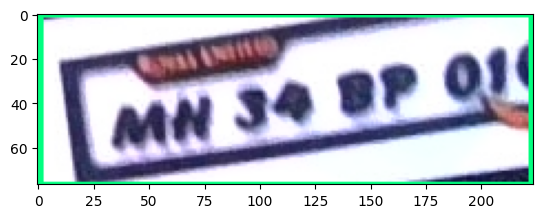

[]


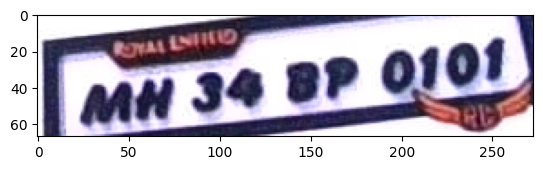

[]


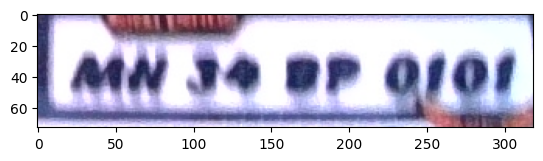

[]


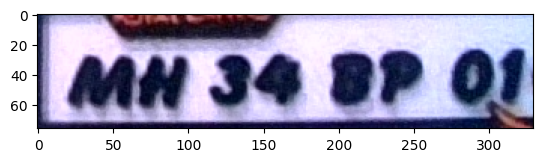

[]


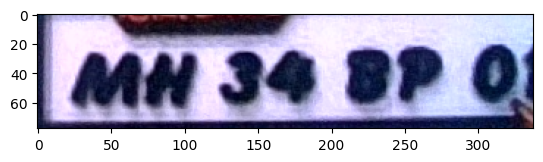

[]


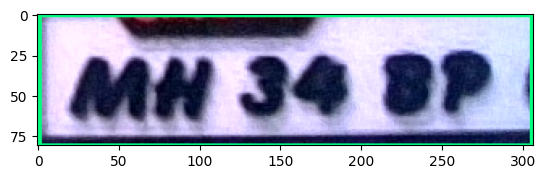

['Mnjuep']


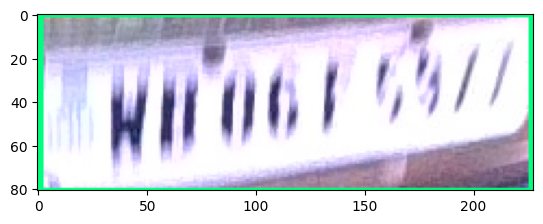

[]


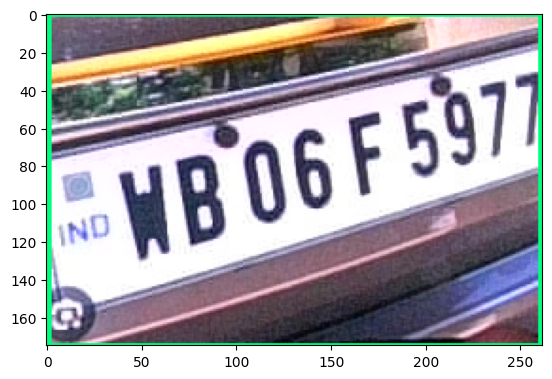

[]


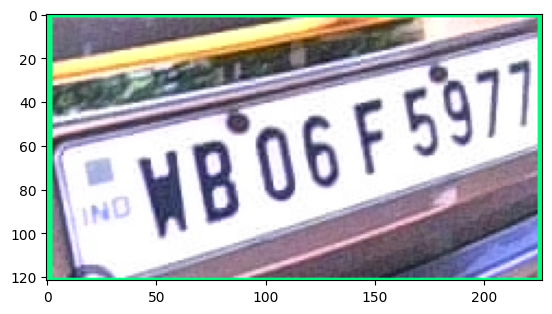

[]


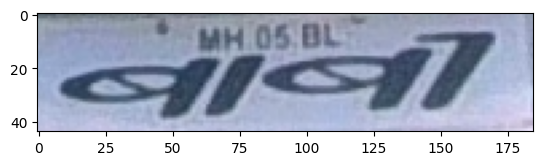

['4']


In [51]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'realtimeresults.csv', 'Detection_Img')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [46]:
import requests

# Function to fetch vehicle information for a single vehicle number
def fetch_vehicle_info(vehicle_no):
    url = "https://rto-vehicle-information-india.p.rapidapi.com/getVehicleInfo"
    payload = {
        "vehicle_no": vehicle_no,
        "consent": "Y",
        "consent_text": "I hereby give my consent for Eccentric Labs API to fetch my information"
    }
    headers = {
        "content-type": "application/json",
        "X-RapidAPI-Key": "4397adfbd8msh96cecc5dc3db3ebp1284d2jsn5a0b82b17090",
        "X-RapidAPI-Host": "rto-vehicle-information-india.p.rapidapi.com"
    }
    response = requests.post(url, json=payload, headers=headers)
    return response.json()

# Input vehicle number from user
vehicle_number = input("Enter the vehicle number  : ")

# Fetch and print vehicle information
vehicle_info = fetch_vehicle_info(vehicle_number)
print("Vehicle Number:", vehicle_number)
print("Vehicle Information:", vehicle_info)


Enter the vehicle number  :  DL7CQ 1939


Vehicle Number: DL7CQ 1939
Vehicle Information: {'status': True, 'data': {'registration_authority': 'MAYUR VIHAR , Delhi', 'registration_no': 'DL7CQ1939', 'registration_date': '28-Jan-2018', 'chassis_no': 'MALC181CLJM3XXXXX', 'engine_no': 'G4FGHW6XXXXX', 'owner_name': 'HANNAH ISAAC', 'vehicle_class': 'Motor Car(LMV)', 'fuel_type': 'PETROL', 'maker_model': 'HYUNDAI MOTOR INDIA LTD / CRETA 1.6 VTVT E+', 'fitness_upto': '27-Jan-2033', 'insurance_upto': '27-Jan-2022', 'fuel_norms': 'BHARAT STAGE IV', 'vehicle_info': None, 'vehicle_type': 'car_models', 'insurance_company': 'National Insurance Co. Ltd.', 'financier_name': None, 'puc_upto': '09-Aug-2022', 'road_tax_paid_upto': 'LTT', 'vehicle_color': 'PHANTOM BLACK', 'seat_capacity': '5', 'unload_weight': '1234', 'body_type_desc': 'STATION WAGON', 'manufacture_month_year': '1/2018', 'rc_status': 'ACTIVE', 'ownership': None, 'ownership_desc': None}}
